In [7]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

im = Image.open('../../data/train/ALB/img_00003.jpg')
im_g = im.convert('L')
_im = np.array(im_g)

In [8]:
imhist, bins = np.histogram(_im.flatten(), 256, normed=True)
cdf = imhist.cumsum()

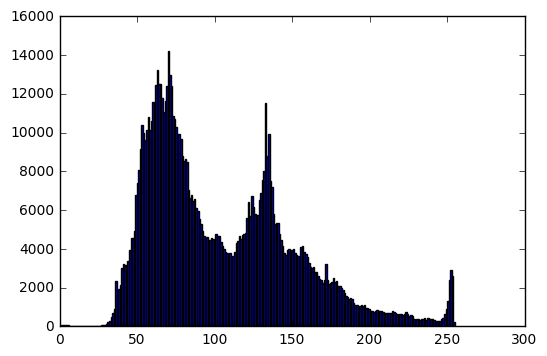

In [9]:
plt.hist(_im.flatten(), 256)
plt.show()

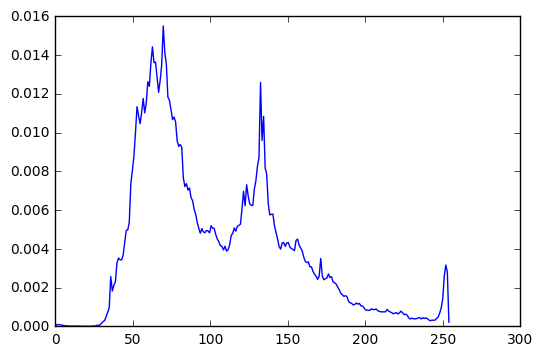

In [10]:
plt.plot(bins[:-1], imhist)
plt.show()

In [11]:
cdf = cdf * 255

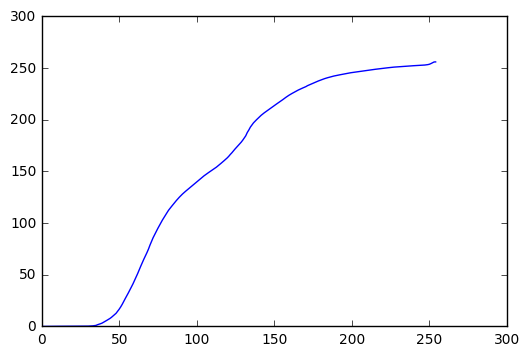

In [12]:
plt.plot(bins[:-1], cdf)
plt.show()

In [13]:
im2 = np.interp(_im.flatten(), bins[:-1], cdf)
#im2 = im2.reshape(_im.shape)

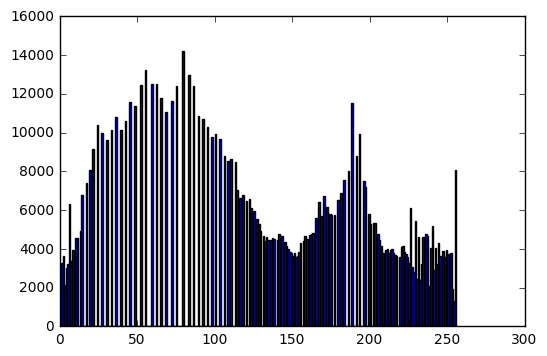

In [14]:
plt.hist(im2.flatten(), 256)
plt.show()

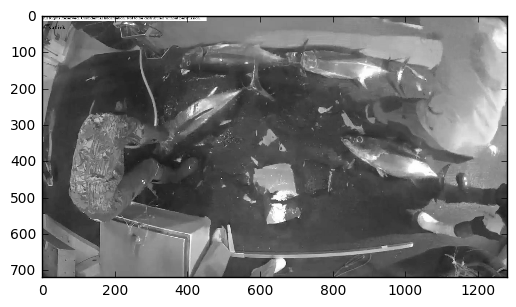

In [15]:
plt.gray()
im2 = im2.reshape(_im.shape)
plt.imshow(_im)
plt.show()

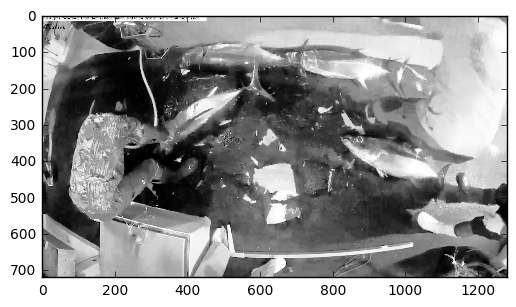

In [16]:
plt.imshow(im2)
plt.show()

In [17]:
def imgavg(imlist):
    avgim = np.array(Image.open(imlist[0]).convert('L'), 'f')

    for imname in imlist[1:10]:
        try:
            tmp = np.array(Image.open(imname).convert('L').resize((1280, 720)), 'f')
            avgim += tmp
        except Exception as e:
            print('%s skipped' % imname)
    avgim /= len(imlist[:10])
    return np.array(avgim, 'uint8')

import os, glob
def get_images_path(fish):
    fold_path = os.path.join('..', '..', 'data', 'train', fish, '*.jpg')
    return glob.glob(fold_path)


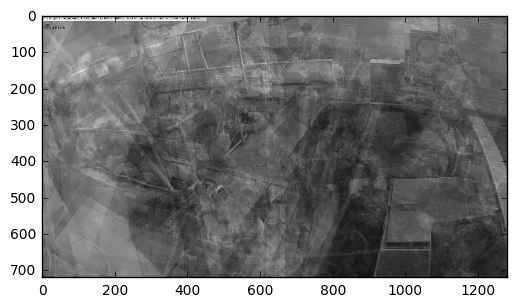

In [18]:
imlist = get_images_path('ALB')
avg_im = imgavg(imlist)
plt.imshow(avg_im)
plt.show()

In [36]:
def pca(X):
    num_data, dim = X.shape
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if dim > num_data:
        M = np.dot(X, X.T)
        e, EV = np.linalg.eigh(M)
        tmp = np.dot(X.T, EV).T
        V = tmp[::-1]
        S = np.sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:, i] /= S
    else:
        U, S, V = np.linalg.svd(X)
        V = V[: num_data]
    return V, S, mean_X

In [51]:
im_matrix = np.array([np.array(Image.open(im).convert('L').resize((1280, 720))).flatten() for im in imlist[:10]], 'f')

In [52]:
V, S, re = pca(im_matrix)

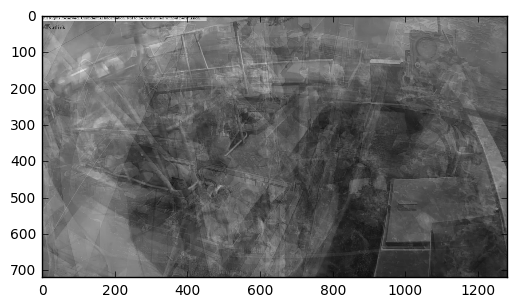

In [54]:
re.shape
plt.imshow(re.reshape(720, 1280))
plt.show()

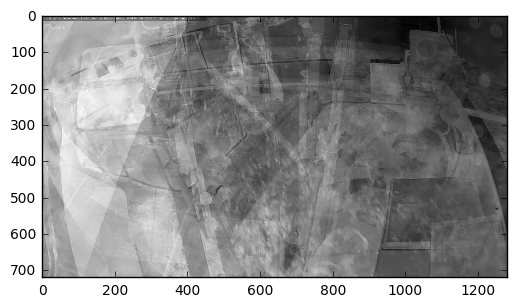

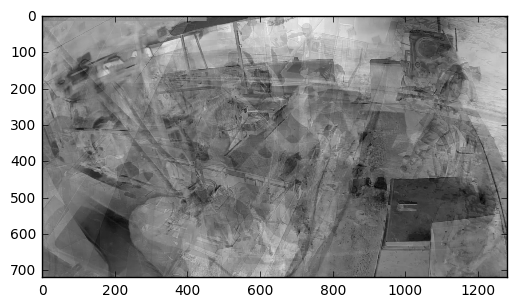

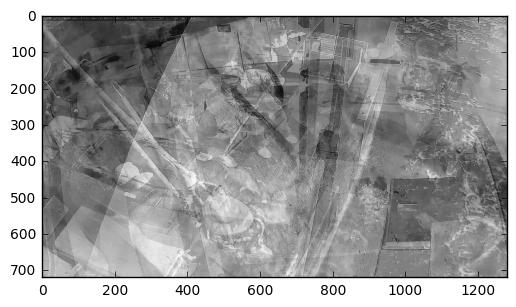

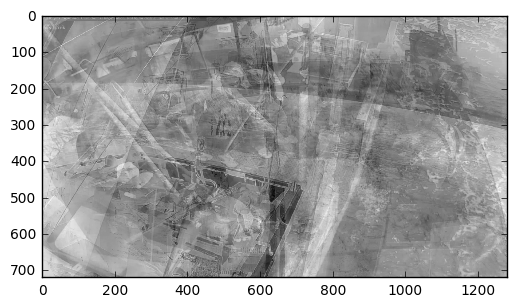

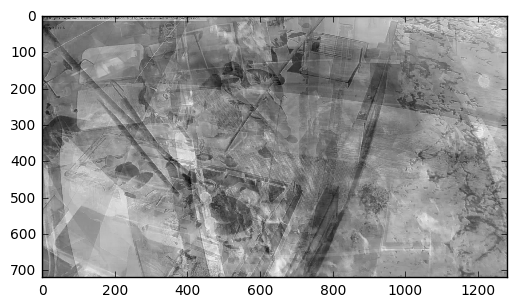

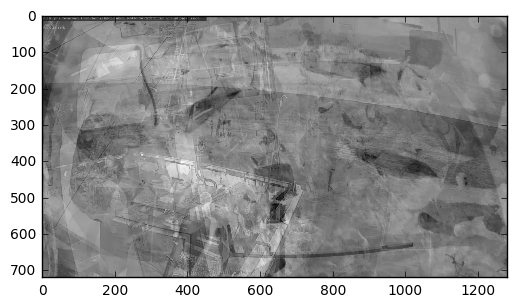

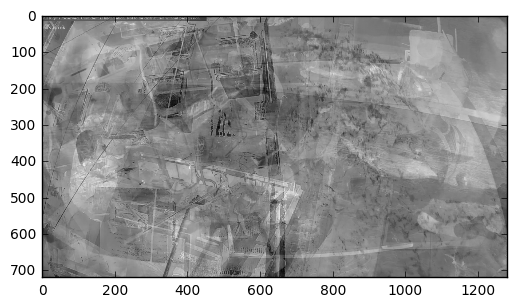

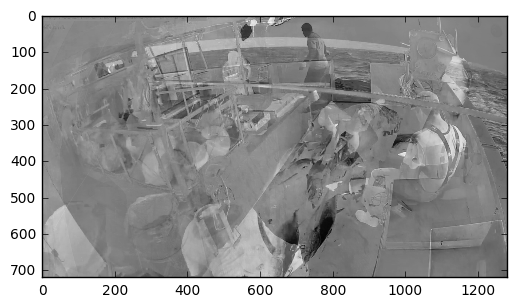

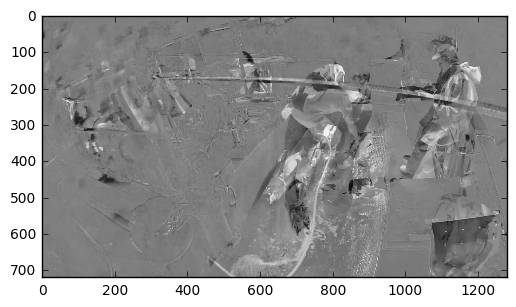

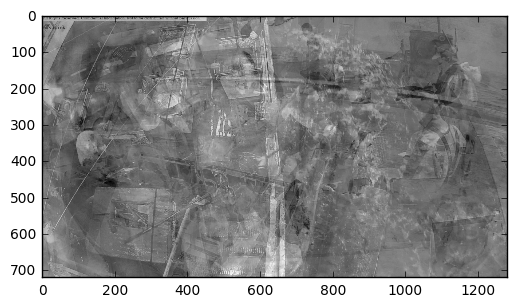

In [56]:
for i in range(10):
    plt.imshow(V[i].reshape(720, 1280))
    plt.show()

In [58]:
a = np.arange(3*4*5*6).reshape((3,4,5,6))
b = np.arange(3*4*5*6)[::-1].reshape((5,4,6,3))

In [59]:
np.dot(a, b)

array([[[[[[  5220,   5205,   5190],
           [  4950,   4935,   4920],
           [  4680,   4665,   4650],
           [  4410,   4395,   4380]],

          [[  4140,   4125,   4110],
           [  3870,   3855,   3840],
           [  3600,   3585,   3570],
           [  3330,   3315,   3300]],

          [[  3060,   3045,   3030],
           [  2790,   2775,   2760],
           [  2520,   2505,   2490],
           [  2250,   2235,   2220]],

          [[  1980,   1965,   1950],
           [  1710,   1695,   1680],
           [  1440,   1425,   1410],
           [  1170,   1155,   1140]],

          [[   900,    885,    870],
           [   630,    615,    600],
           [   360,    345,    330],
           [    90,     75,     60]]],


         [[[ 17874,  17823,  17772],
           [ 16956,  16905,  16854],
           [ 16038,  15987,  15936],
           [ 15120,  15069,  15018]],

          [[ 14202,  14151,  14100],
           [ 13284,  13233,  13182],
           [ 12366,  123